In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
csv_path = r'C:\Users\devin\CitadelDatathon\merged_compact.csv'
loss_threshold = 0

df = pd.read_csv(csv_path)
loss = df[(df["Order Profit"] / df["Sales"]) < loss_threshold]

<AxesSubplot:ylabel='Frequency'>

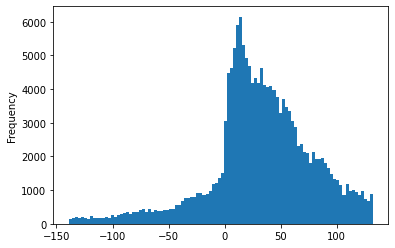

In [3]:
l = df["Order Profit"]
l = l[l.between(l.quantile(0.05), l.quantile(.95))]

l.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

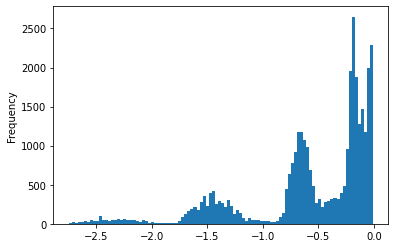

In [4]:
l = loss["Order Profit"]/loss["Sales"]

#l = l[l.between(l.quantile(0.05), l.quantile(.95))]

l.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

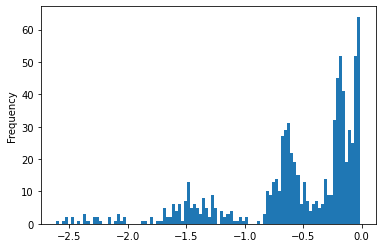

In [5]:
l = loss[loss["Order Status"] == "SUSPECTED_FRAUD"]
l = l["Order Profit"]/l["Sales"]

#l = l[l.between(l.quantile(0.05), l.quantile(.95))]

l.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

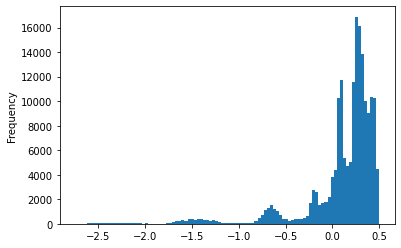

In [6]:
a = df[df["Order City"] != df["Customer City"]]
a = a["Order Profit"]/a["Sales"]
a.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

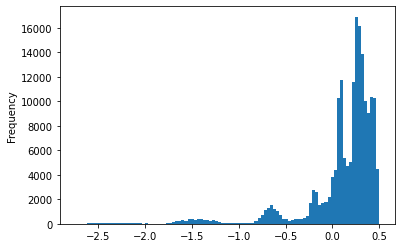

In [7]:
b = df["Order Profit"]/df["Sales"]
b.plot.hist(bins=100)

In [ ]:
c = df["Order Customer Id"].value_counts()
lpc = loss["Order Customer Id"].value_counts()
(lpc/c).plot.bar()

In [ ]:
freq = df["Order Customer Id"].value_counts()
c = freq[freq>=10].index
cu = df[df["Order Customer Id"].isin(c)]
cuv = cu["Order Customer Id"].value_counts()
        
cul = cu[cu["Order Profit"] < 0]
lpc = cul["Order Customer Id"].value_counts()

(lpc/cuv).plot.bar()

In [ ]:
c = df["Order Department Id"].value_counts()
lpc = loss["Order Department Id"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Market"].value_counts()
lpc = loss["Market"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Order Country"].value_counts()
lpc = loss["Order Country"].value_counts()
(lpc/c).plot.bar()

In [ ]:
freq = df["Order Country"].value_counts()
c = freq[freq>10].index
cu = df[df["Order Country"].isin(c)]
cuv = cu["Order Country"].value_counts()
        
cul = cu[cu["Order Profit"] < 0]
lpc = cul["Order Country"].value_counts()

(lpc/cuv).plot.bar()

In [ ]:
c = df["Order Item Discount Rate"].value_counts()
lpc = loss["Order Item Discount Rate"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Type"].value_counts()
lpc = loss["Type"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Days for shipping (real)"].value_counts()
lpc = loss["Days for shipping (real)"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Delivery Status"].value_counts()
lpc = loss["Delivery Status"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Product Name"].value_counts()
lpc = loss["Product Name"].value_counts()
(lpc/c).plot.bar()

In [ ]:
freq = df["Product Name"].value_counts()
c = freq[freq >= 10].index
cu = df[df["Product Name"].isin(c)]
cuv = cu["Product Name"].value_counts()
        
cul = cu[cu["Order Profit"] < 0]
lpc = cul["Product Name"].value_counts()

(lpc/cuv).plot.bar()

In [ ]:
c = df["Product Price"].value_counts()
lpc = loss["Product Price"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Customer Segment"].value_counts()
lpc = loss["Customer Segment"].value_counts()
(lpc/c).plot.bar()

In [ ]:
c = df["Category Name"].value_counts()
lpc = loss["Category Name"].value_counts()
(lpc/c).plot.bar()

In [ ]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
sn.heatmap(loss.corr(), annot=True)
plt.show()

In [ ]:
sn.heatmap(loss[loss["Order Status"] == "SUSPECTED_FRAUD"].corr(), annot=True)
plt.show()

In [ ]:
freq = loss["Product Name"].value_counts()
fpn = freq[freq >= 10].index
lpn = df[df["Product Name"].isin(fpn)]

lpn.groupby("Product Name", as_index=False)["Order Profit"].mean().sort_values(by=["Order Profit"], ascending=False)

In [ ]:
freq = loss["Order Customer Id"].value_counts()
fpn = freq[freq >= 5].index
lpn = df[df["Order Customer Id"].isin(fpn)]

lpn.groupby("Order Customer Id", as_index=False)["Order Profit"].mean().sort_values(by=["Order Profit"], ascending=False)

In [ ]:
freq = loss["Order Customer Id"].value_counts()
fpn = freq[freq >= 3].index
lpn = df[df["Order Customer Id"].isin(fpn)]

pd.set_option('display.max_rows', 500)
prod = lpn["Product Name"].value_counts()
prod

In [ ]:
freq = loss["Order Customer Id"].value_counts()
fpn = freq[freq >= 3].index
lpn = df[df["Order Customer Id"].isin(fpn)]

freq = lpn["Product Name"].value_counts()
prod_freq = freq[freq >= 100].index

prod_df = df[df["Product Name"].isin(prod_freq)]
prod_loss = loss[loss["Product Name"].isin(prod_freq)]

c = prod_df["Order Country"].value_counts()
lpc = prod_loss["Order Country"].value_counts()

loss_pct_country = (lpc/c)
loss_pct_country.plot.bar()

In [ ]:
loss_pct_country.sort_values(ascending=False)